# **Código del entregable 1: Iván Pérez & Jon Mañueco**

Aunque se vaya comentando lo que se hace para dar consistencia a esta parte del código, se tratará de explicar con todo detalle en el PDF que también se ha adjuntado.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Idea del método:

**Ecuación del calor unidimensional:** $\frac{\partial T}{\partial t} = \chi_T\frac{\partial^2T}{\partial x^2}$

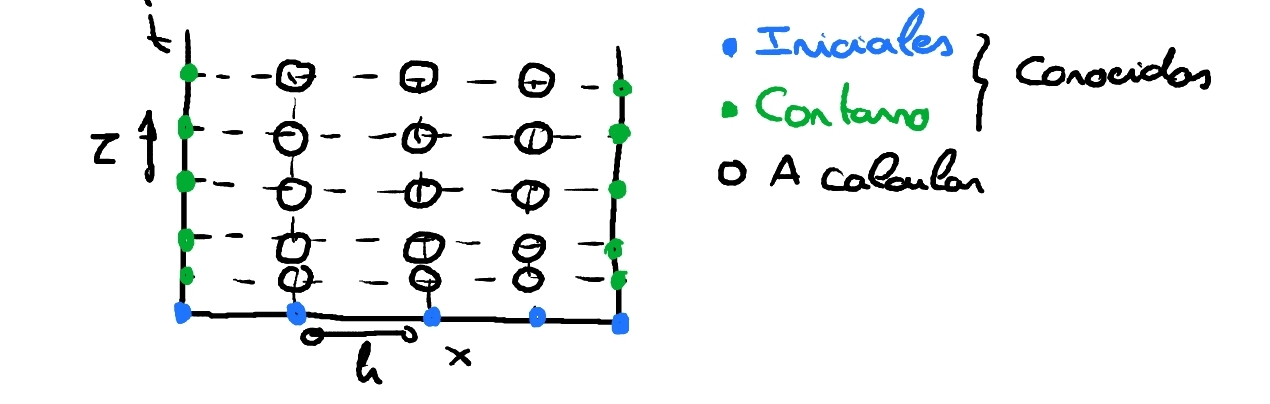

**La idea es discretizar el espacio-tiempo**:

$t_n = (n-1)\tau$ ; $x_i = (i-1)h$ con $\tau$ paso temporal y $h$ tamaño de la cuadrícula tal y como se muestra en el diagrama. Además, $n,i = 1,2,3,...$

**Tras esto, se hacen desarrollos de Fourier (diferencias finitas) y se llega a que se pueden estimar las derivadas como:**

$\frac{\partial T}{\partial t}(x,t) = \frac{T_i^{n+1} - T_i^n}{\tau}$

$\frac{\partial^2T}{\partial x^2} = \frac{T_{i+1}^n + T_{i-1}^n - 2T_i^n}{h^2}$


Donde $T_i^n \equiv T(x_i,t_n)$ y, por ejemplo $T_i^{n+1} \equiv T(x_i,t_n + \tau)$

Quedando la ecuación por tanto como:

$T_i^{n+1} = T_i^n + \frac{\chi_T\tau}{h^2}\left(T_{i+1}^n + T_{i-1}^n - 2T_i^n\right)$

Con esto y, como se muestra en el esquema, puesto que las condiciones de contorno e iniciales son conocidas (paredes de la malla), se pueden ir calculando los valores de $T_i^n$ de forma recurrente

### **Código para hallar $T(x_i,t_n)$ dadas las condiciones iniciales y de contorno, así como un paso temporal $\tau$ y espacial $h$**

La idea del código va a ser, tal y como se muestra en el esquema, crear una matriz del calor a partir de la primera fila de la CI que es conocida, a partir de esa se puede hallar la fila del primer instante temporal, los $n-2$ valores (teniendo en cuenta que hay 2 en las CC), con eso la fila que se añade a la matriz es CC_0 + fila nueva + CC_1 y así sucesivamente

In [2]:
def SolNumEqCalor(CI,CC_0,CC_1,tau,h,chi): #También metemos el valor de chi como input
    #Supongo que CI y CC_0 (x = 0), CC_1 (x = L) se dan como listas de Python o arrays de numpy. Si no es así habría que trabajar con ellas...
    #...Previamente para acabar teniendo esto (discretización del espacio tiempo)
    
    tol = 1e-6 #Tolerancia para parar de avanzar en el tiempo puesto que se alcanza el estado estacionario
    
    matrizCalor = np.array([CI]) #Inicializamos la matriz ahí
    for n in range(1, len(CC_0)): #Primer bucle para ir recorriendo verticalmente la matriz. Esencialmente es ir recorriendo en el tiempo
        fila_n = []
        for i in range(1,len(CI)-1): #Segundo bucle para ir recorriendo horizontalmente la matriz
            fila_n.append(matrizCalor[n-1,i] + tau*chi/h**2*(matrizCalor[n-1,i+1] + matrizCalor[n-1,i-1] - 2*matrizCalor[n-1,i]))
        fila_n = np.concatenate(([CC_0[n]],fila_n,[CC_1[n]])) #Como CC_0[n] es un elemento, se mete como lista para evitar problemas con concat
        
        error_vec = np.abs(fila_n - matrizCalor[n-1,:])
        
        if np.max(error_vec) >= tol:
            matrizCalor = np.concatenate((matrizCalor,[fila_n])) #Aunque fila_n es ya una lista, se usa un doble corchete para leerlo como matriz.
        else:
            return(matrizCalor) #Nos saca la matriz de calor en el momento que se llega a la tolerancia con lo que no se recorre todo el tiempo

### **Establecimiento del estado estacionario:**

Como se nos pide representar todo hasta el estado estacionario, se hace un comentario de cómo hacemos esto:

Como sabemos, el establecimiento del estado estacionario se da cuando:
<center>$\frac{\partial T}{\partial t} = 0$</center>
<br>
Para determinar en qué tiempo se alcanza dicho estado estacionario, lo que tiene sentido hacer es tomar una tolerancia, es decir, fijar nosotros qué cambio consideramos suficientemente cercano a cero en la derivada temporal.

Para ello obsérvese que cada tiempo representa una fila en la que tenemos varios puntos en el espacio, luego se puede calcular una derivada temporal en cada punto del espacio. Lo que se hace es tomar el máximo de dichas derivadas temporales y, cuando ese máximo sea menor que nuestra tolerancia, consideraremos que se ha llegado al estado estacionario. Se puede ver en el código de justo la celda de arriba cómo se hace esto con una toleracia de $10^{-6}$

### **Producción local de entropía:**

Sabemos por lo visto en clase que:
<center>$\sigma = \frac{\kappa}{T^2}(\nabla T)^2$</center>
<br>
O, lo que es lo mismo, en nuestro caso unidimensional:
<center>$\sigma = \frac{\kappa}{T^2}(\frac{\partial T}{\partial x})^2$</center>
<br>
Como se ha discretizado nuestro espacio, no se incide demasiado en ello pues ya se vio en clase, acudiendo a la definición de derivada se puede calcular dicha derivada espacial como:
<center>$\frac{\partial T}{\partial x} = \frac{T_{i+1}^n - T_i^n}{h}$</center>
<br>
Esto permite calcular la derivada para cada punto de nuestro mallado, nos quedamos solo en la parte interna, quitamos bordes.

In [3]:
#Función para calcular la producción total de entropía 

def EntropLocal(matrizCalor, h):
    matrizEntropia = np.zeros(np.shape(matrizCalor))
    matrizEntropia = matrizEntropia[:,1:-1] #Quitamos primera y última columnas pues no se van a calcular
    
    for i in range(np.shape(matrizCalor)[0]):
        gradT = (matrizCalor[i,2:]-matrizCalor[i,1:-1])/h
        matrizEntropia[i,:] = (gradT/matrizCalor[i,1:-1])**2
    
    return matrizEntropia

### **Llamamos a las funciones para que calculen lo que queremos**:

Démonos cuenta de que muchos valores son los mismos en todos los casos (condiciones iniciales, de contorno en $x = 0$, $\chi$) y solo varía el valor de $T_2$. Además, se va a tomar el mismo mallado en todos los casos con los siguientes valores:

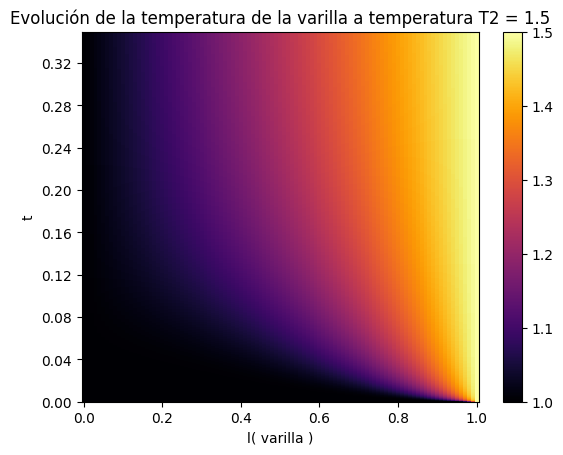

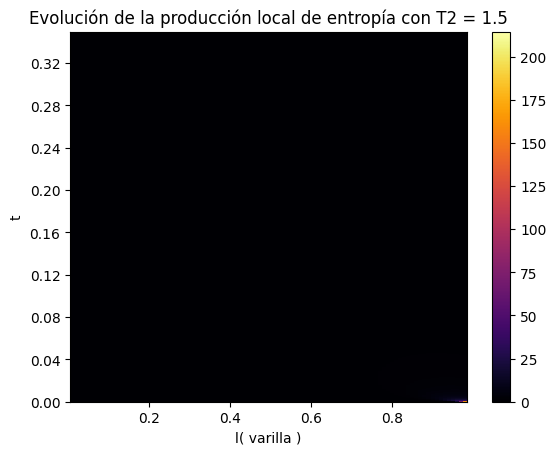

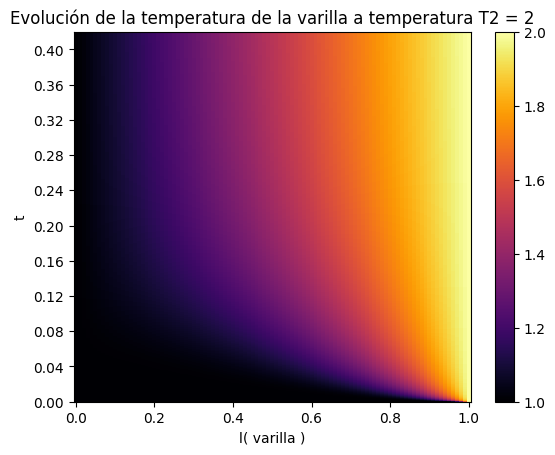

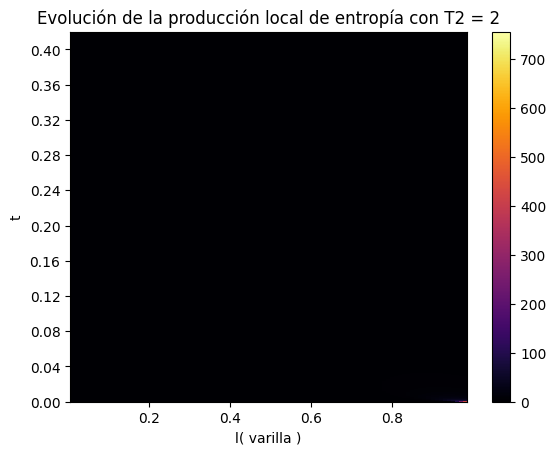

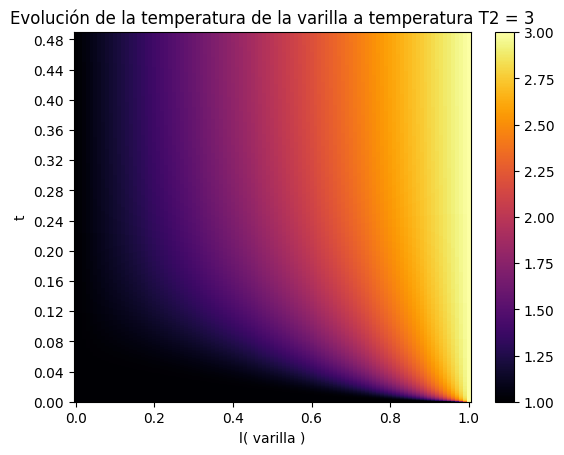

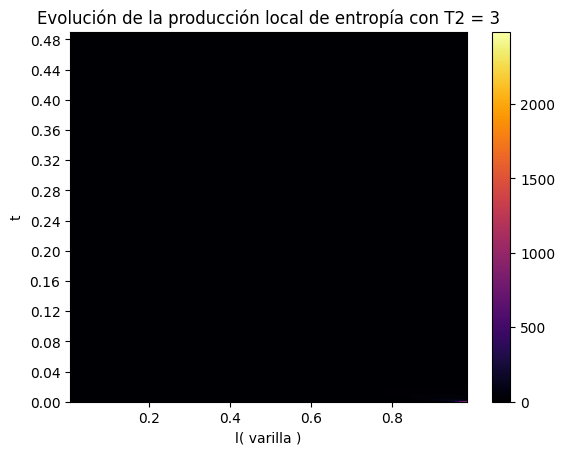

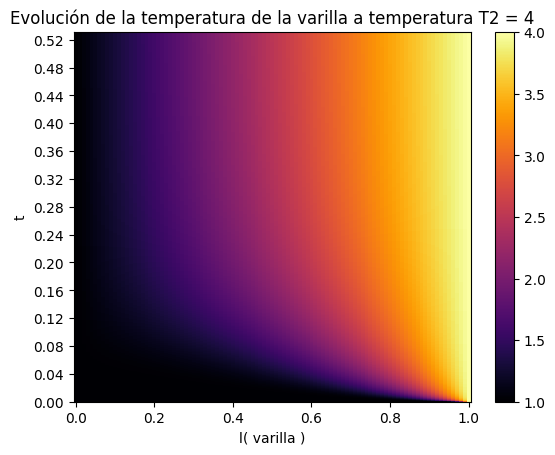

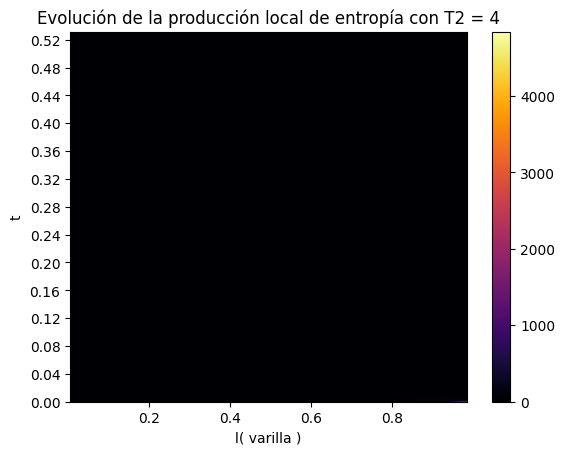

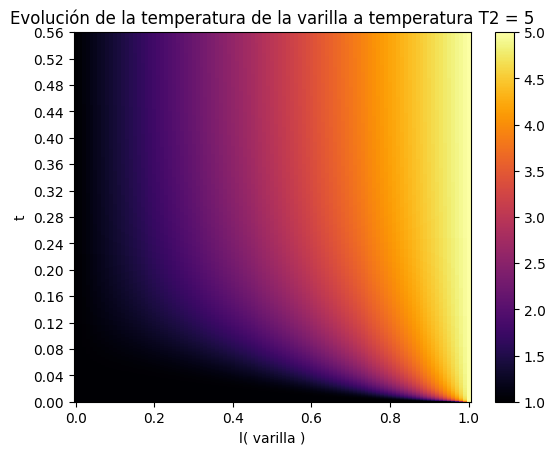

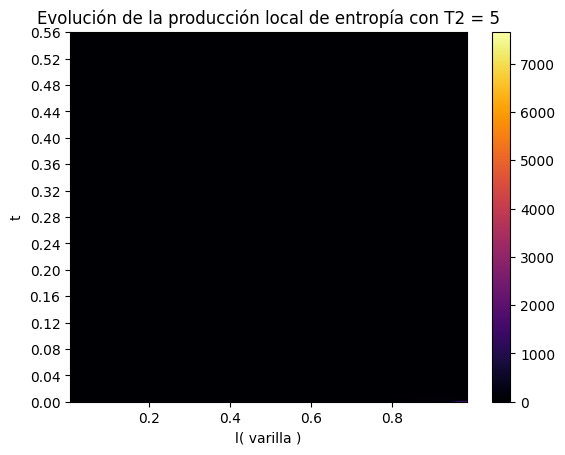

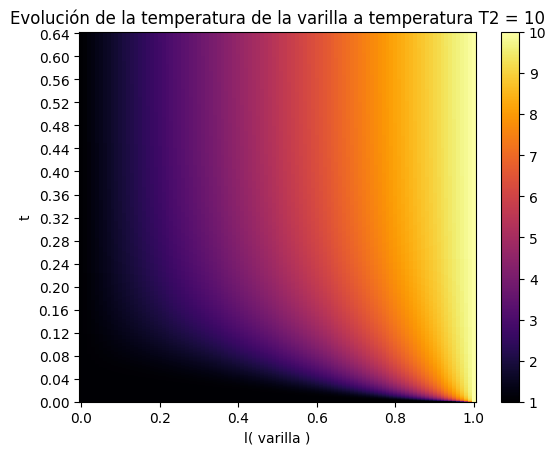

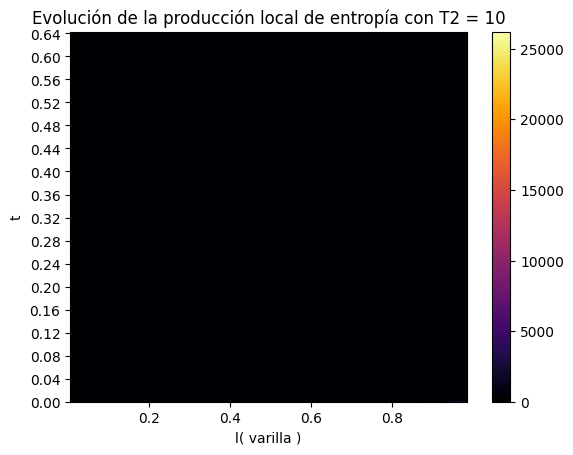

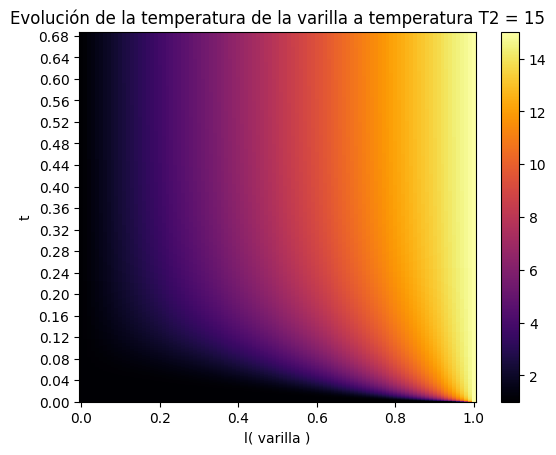

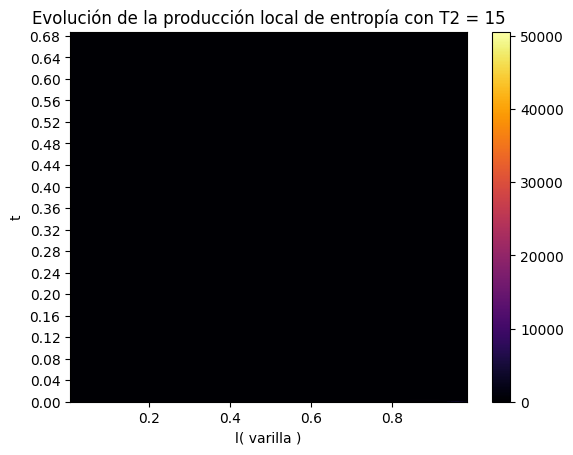

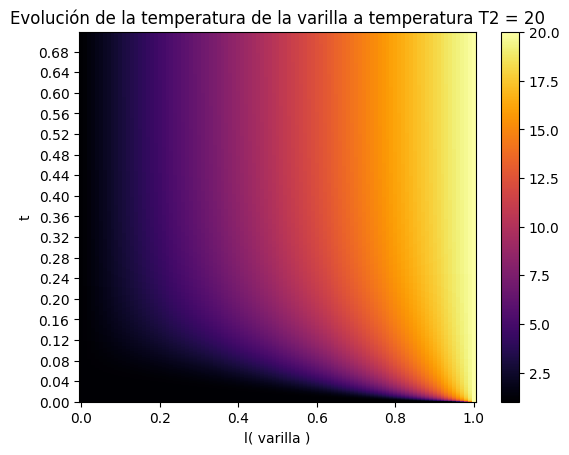

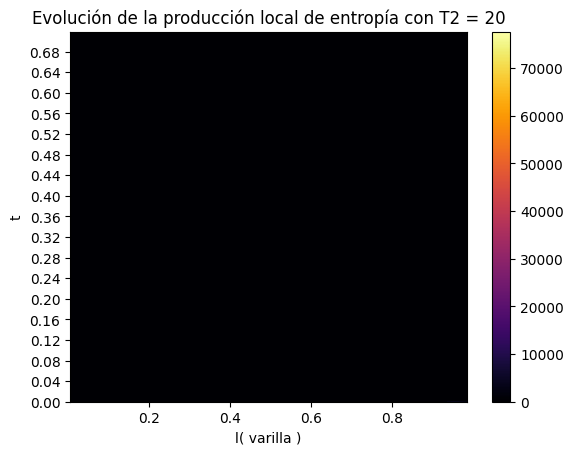

In [7]:
tau = 1e-5
h = 1e-2
chi = 1

#Creamos el mallado
x = np.arange(0,1+h,h)
t = np.arange(0,1e3+tau,tau) #Se toma un vector muy largo de tiempos, pero por cómo hemos tomado la tolerancia, parará antes con lo cual no se hará...
                             # ... un bucle tan largo como parece, pero así aseguramos llegar al e.e.

#Condiciones iniciales y de contorno que no cambian
CI = np.ones(len(x))
CC_0 = np.ones(len(t))

for j in [1.5,2,3,4,5,10,15,20]: #Aquí simplemente recorremos todos los valores de T2 que se nos piden
    CC_1 = j*np.ones(len(t))
    matriz_Calor = SolNumEqCalor(CI,CC_0,CC_1,tau,h,chi)
    matriz_Entropia = EntropLocal(matriz_Calor, h)
    
    #Pintamos los resultados:
    
    plt.pcolormesh(x, t[:np.shape(matriz_Calor)[0]], matriz_Calor,cmap='inferno') #El vector de tiempos llega hasta donde para la matriz solución
    plt.title('Evolución de la temperatura de la varilla a temperatura T2 = ' + str(j))
    plt.xlabel('l( varilla )')
    plt.ylabel('t')
    plt.colorbar()
    plt.yticks(np.arange(t[0], t[np.shape(matriz_Calor)[0]], 0.04)) #Para que se vea mejor las diferencias de tiempos de llegada al e.e
    plt.show()
    
    plt.pcolormesh(x[1:-2], t[:np.shape(matriz_Calor)[0]], matriz_Entropia[:,:-1],cmap='inferno')
    plt.title('Evolución de la producción local de entropía con T2 = ' + str(j))
    plt.xlabel('l( varilla )')
    plt.ylabel('t')
    plt.colorbar()
    plt.yticks(np.arange(t[0], t[np.shape(matriz_Calor)[0]], 0.04))
    plt.show()
    
    



### **Mallado más grueso:**

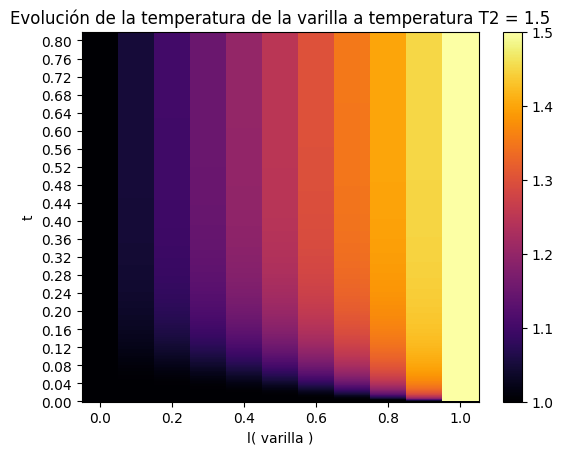

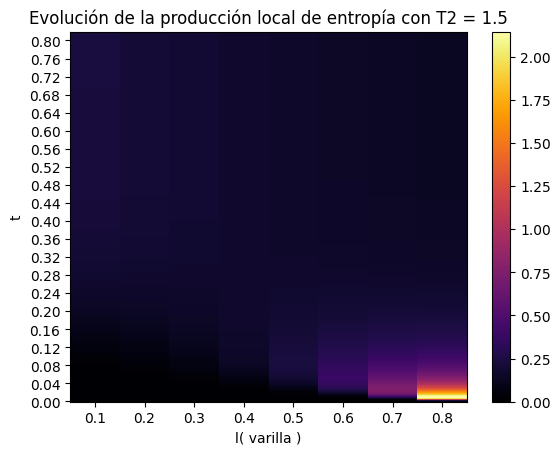

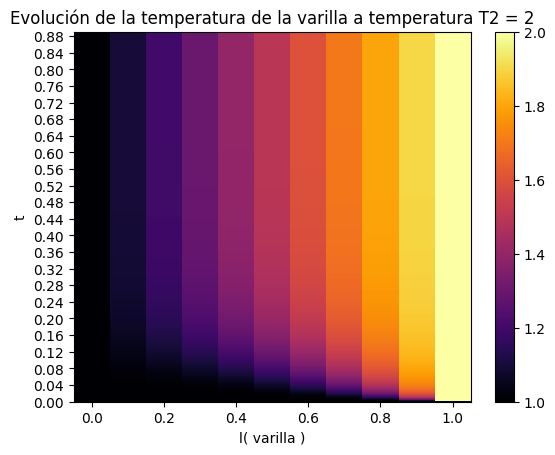

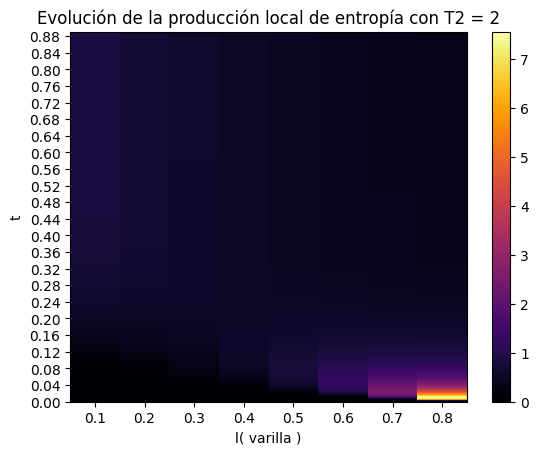

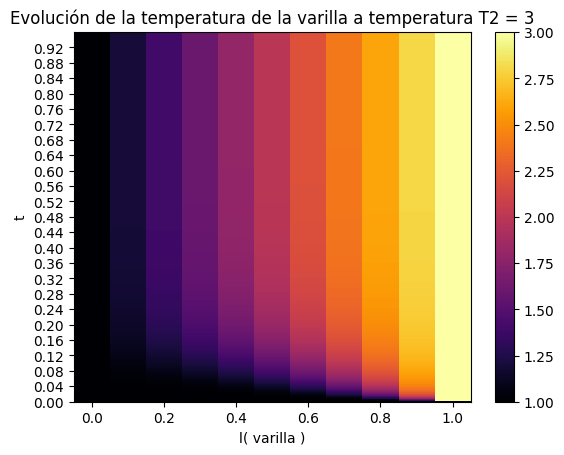

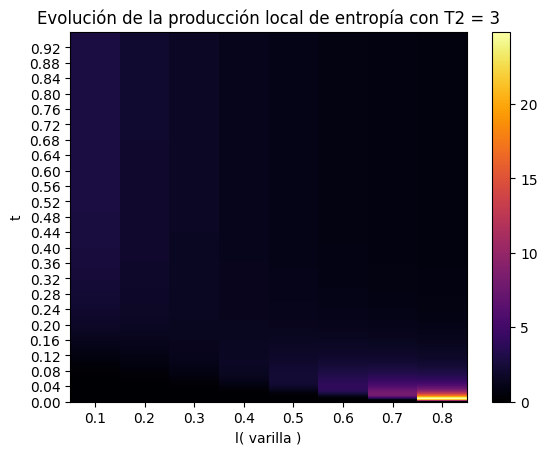

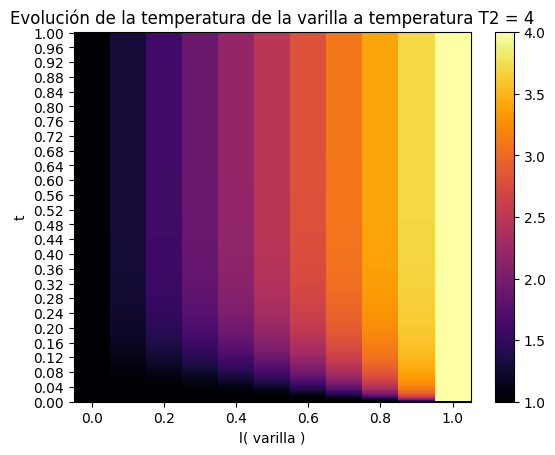

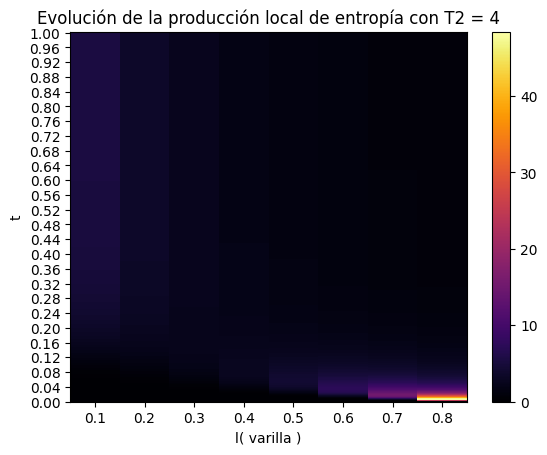

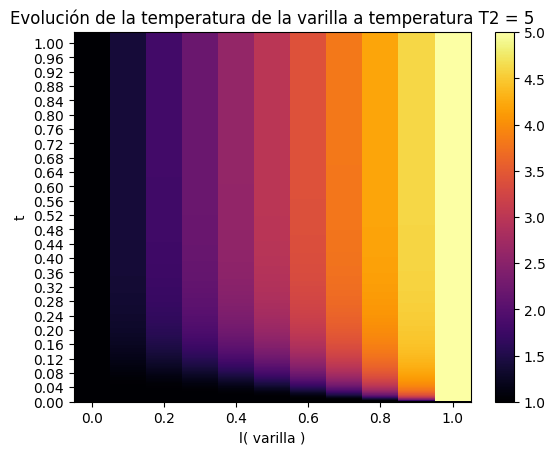

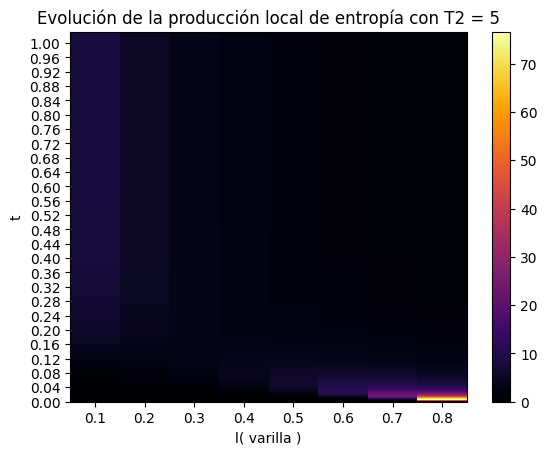

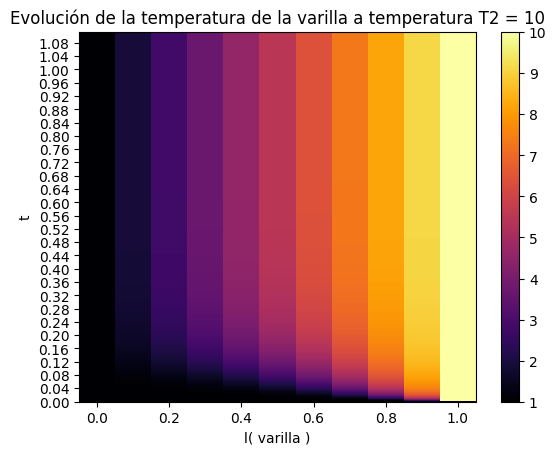

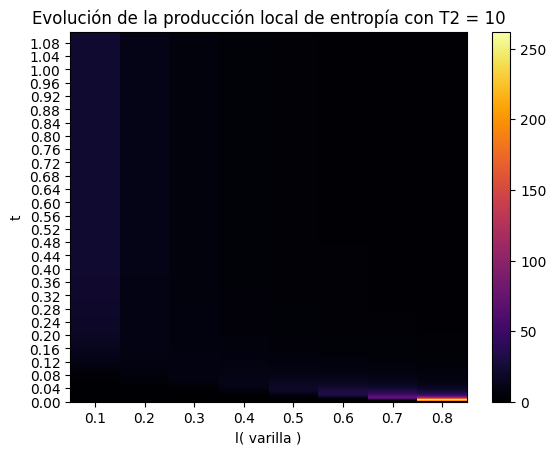

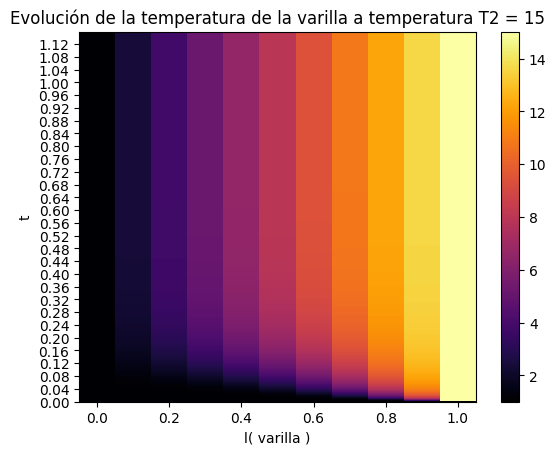

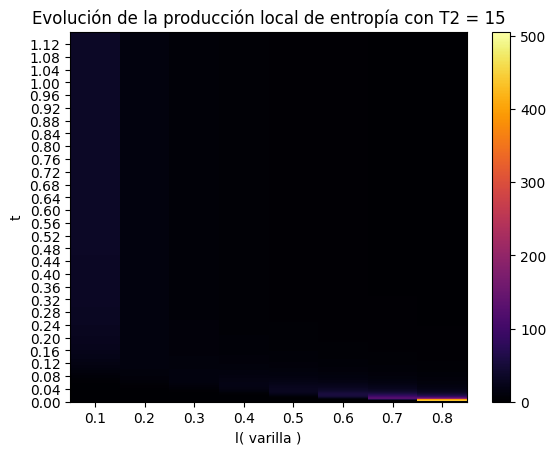

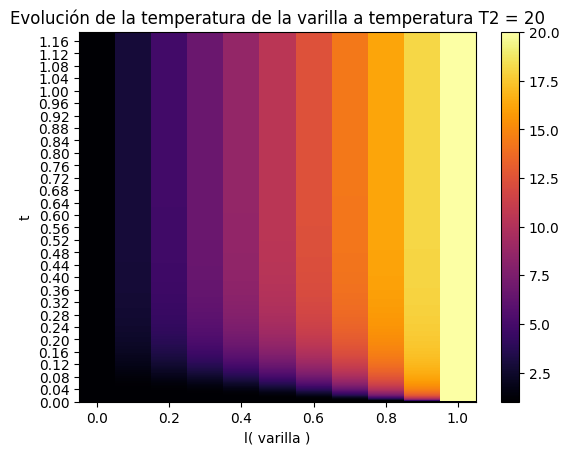

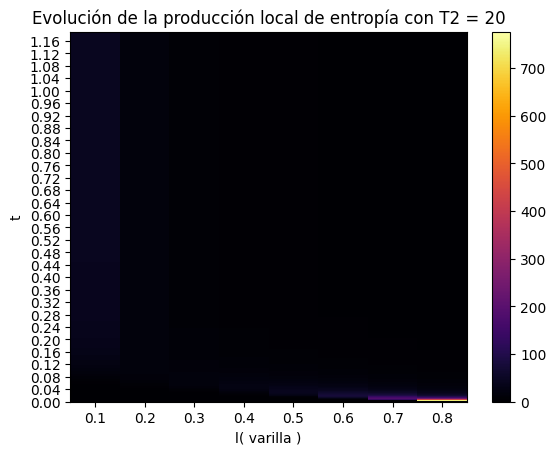

In [8]:
tau2 = 1e-3
h2 = 1e-1
chi2 = 1

#Creamos el mallado
x2 = np.arange(0,1+h2,h2)
t2 = np.arange(0,1e3+tau2,tau2) #Se toma un vector muy largo de tiempos, pero por cómo hemos tomado la tolerancia, parará antes con lo cual no se hará...
                             # ... un bucle tan largo como parece, pero así aseguramos llegar al e.e.

#Condiciones iniciales y de contorno que no cambian
CI2 = np.ones(len(x2))
CC_02 = np.ones(len(t2))

for j in [1.5,2,3,4,5,10,15,20]: #Aquí simplemente recorremos todos los valores de T2 que se nos piden
    CC_12 = j*np.ones(len(t2))
    matriz_Calor2 = SolNumEqCalor(CI2,CC_02,CC_12,tau2,h2,chi2)
    matriz_Entropia2 = EntropLocal(matriz_Calor2, h2)
    
    #Pintamos los resultados:
    
    plt.pcolormesh(x2, t2[:np.shape(matriz_Calor2)[0]], matriz_Calor2,cmap='inferno') #El vector de tiempos llega hasta donde para la matriz solución
    plt.title('Evolución de la temperatura de la varilla a temperatura T2 = ' + str(j))
    plt.xlabel('l( varilla )')
    plt.ylabel('t')
    plt.colorbar()
    plt.yticks(np.arange(t2[0], t2[np.shape(matriz_Calor2)[0]], 0.04)) #Para que se vea mejor las diferencias de tiempos de llegada al e.e
    plt.show()
    
    plt.pcolormesh(x2[1:-2], t2[:np.shape(matriz_Calor2)[0]], matriz_Entropia2[:,:-1],cmap='inferno')
    plt.title('Evolución de la producción local de entropía con T2 = ' + str(j))
    plt.xlabel('l( varilla )')
    plt.ylabel('t')
    plt.colorbar()
    plt.yticks(np.arange(t2[0], t2[np.shape(matriz_Calor2)[0]], 0.04))
    plt.show()

### **Otro mallado distinto:**

Hasta aquí hemos considerado dos mallados de nuestro problema, uno muy fino y otro bastante más grueso. Evidentemente hay diferencias, especialmente en el tiempo que tarda el programa en devolver todos los resultados.

Por último, se va a considerar el mallado con las características que se muestran en el manuscrito "Método numérico" del Campus Virtual. En este se muestra que $\tau = 10^{-4}$ y que en la parte espacial hay 60 puntos, así que lo hacemos así:

Además, se va a utilizar este mallado para el apartado c) del enunciado que se nos propone en el que hay que estudiar la producción total de entropía para todos los valores de $T_2$, por ello introducimos esto en la siguiente celda.

La producción de entropía total en el estado estacionario con T2 = 1.5es 0.16046951681999475
El mínimo de la producción total de entropía con T2 = 1.5es 0.15962716742445893


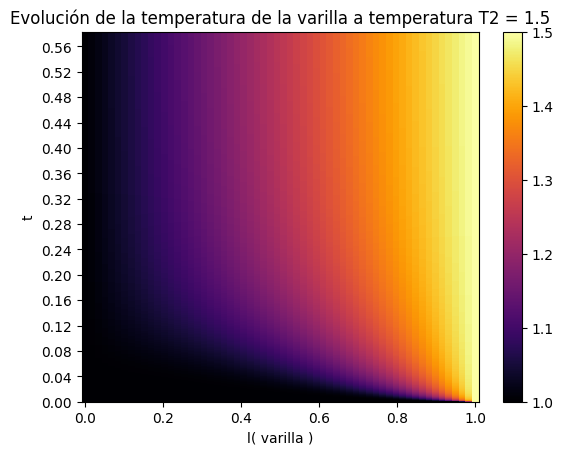

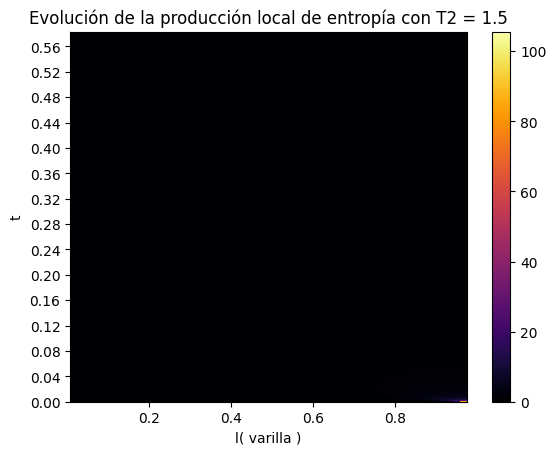

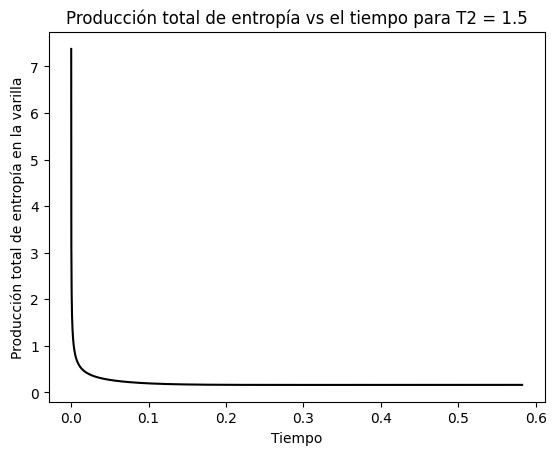

La producción de entropía total en el estado estacionario con T2 = 2es 0.47879337093578656
El mínimo de la producción total de entropía con T2 = 2es 0.4686663161339356


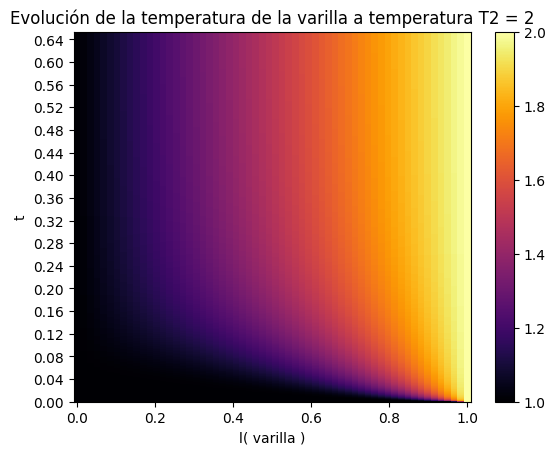

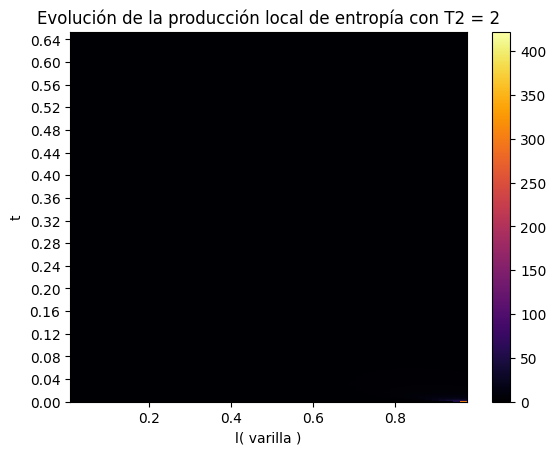

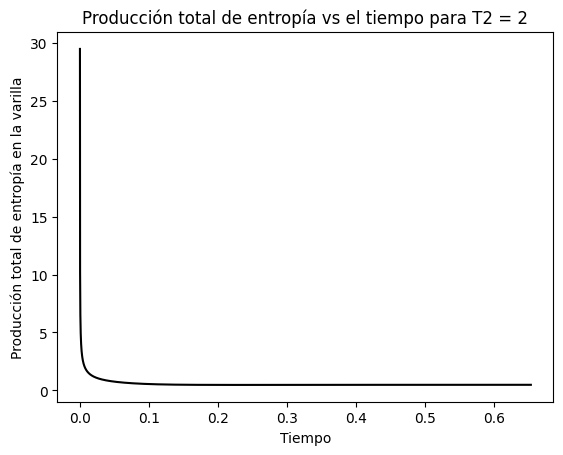

La producción de entropía total en el estado estacionario con T2 = 3es 1.2598242077358004
El mínimo de la producción total de entropía con T2 = 3es 1.1862469933378803


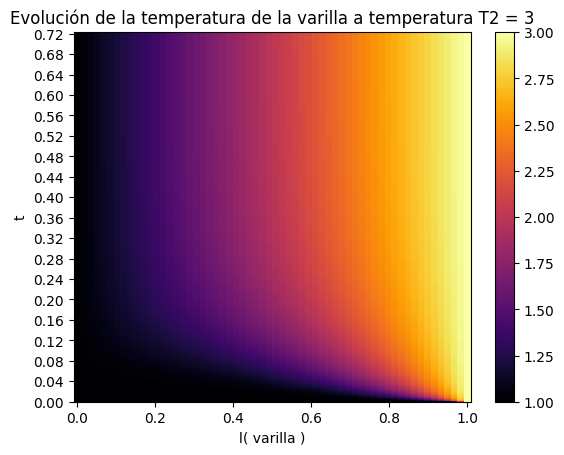

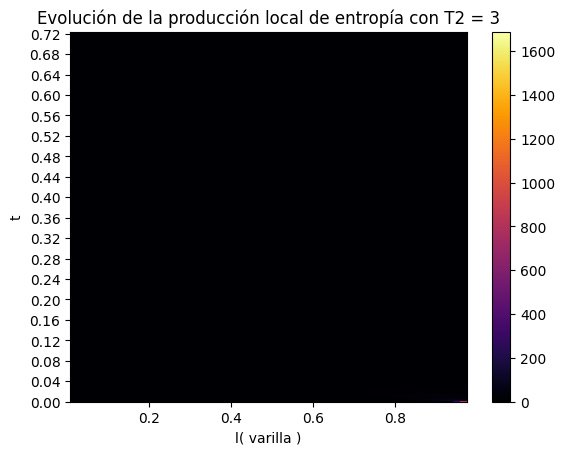

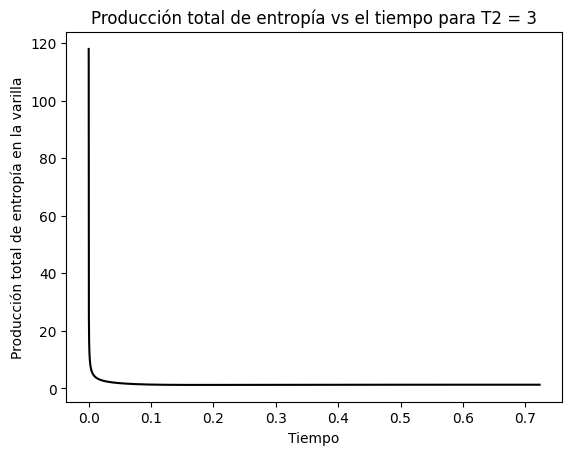

La producción de entropía total en el estado estacionario con T2 = 4es 2.0953923123141593
El mínimo de la producción total de entropía con T2 = 4es 1.9004304274763721


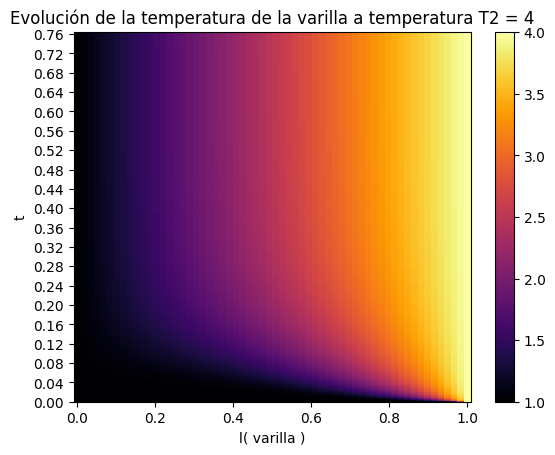

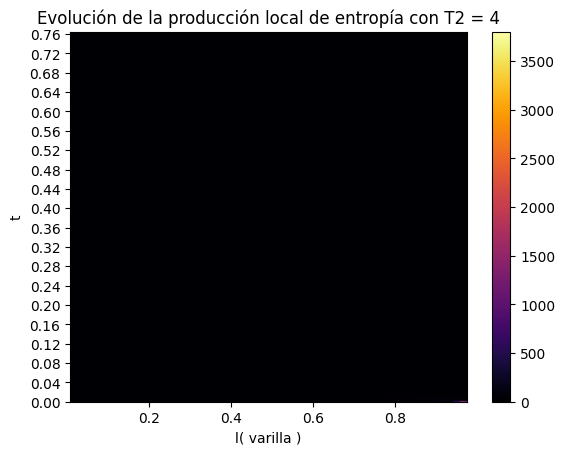

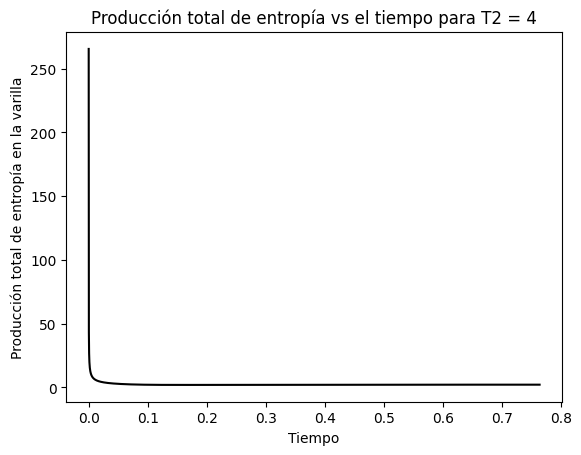

La producción de entropía total en el estado estacionario con T2 = 5es 2.9364842383189664
El mínimo de la producción total de entropía con T2 = 5es 2.5747877926120513


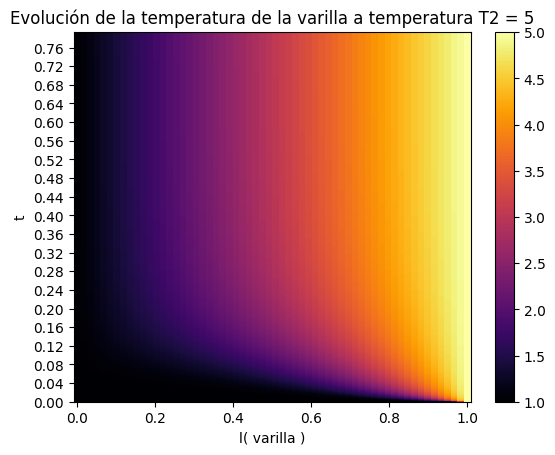

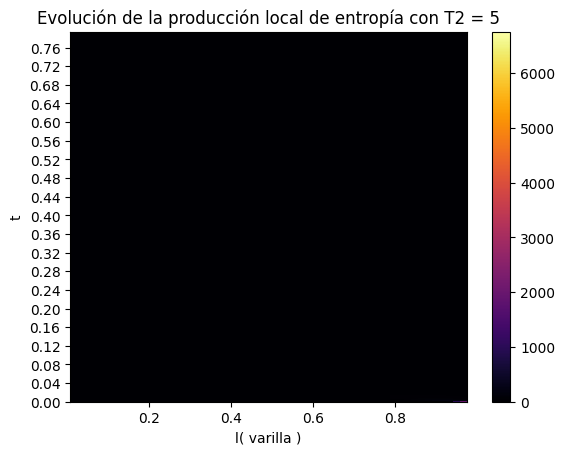

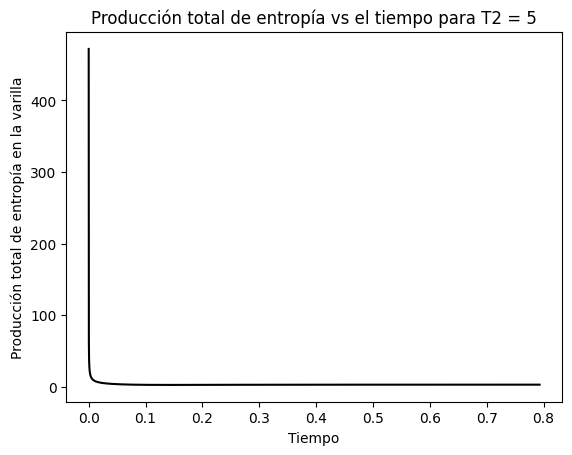

La producción de entropía total en el estado estacionario con T2 = 10es 6.916248750737359
El mínimo de la producción total de entropía con T2 = 10es 5.368055193763782


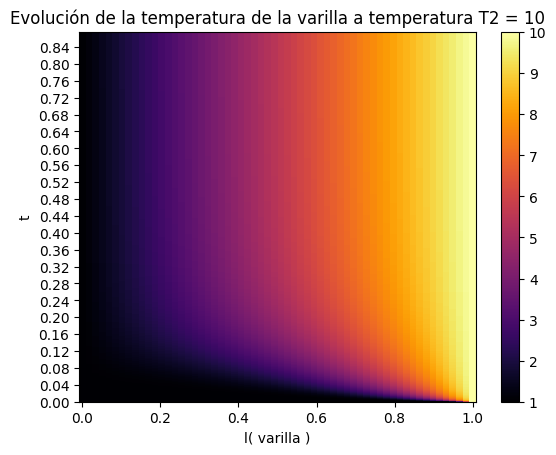

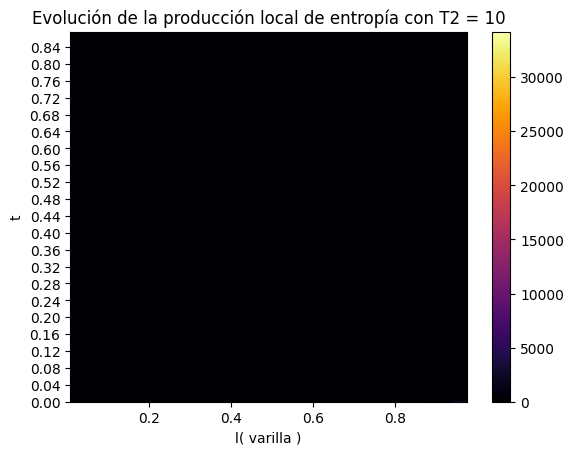

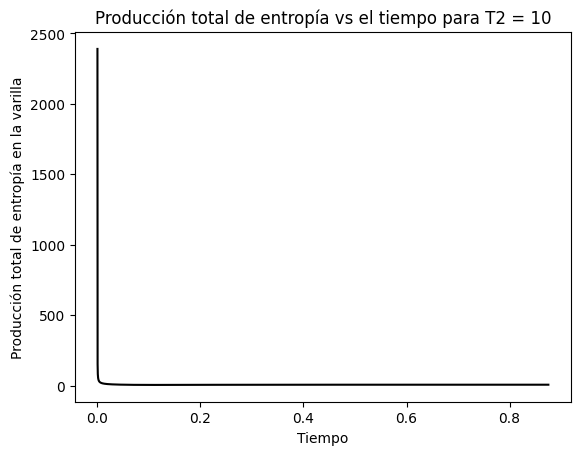

La producción de entropía total en el estado estacionario con T2 = 15es 10.434247833324951
El mínimo de la producción total de entropía con T2 = 15es 7.515617810598542


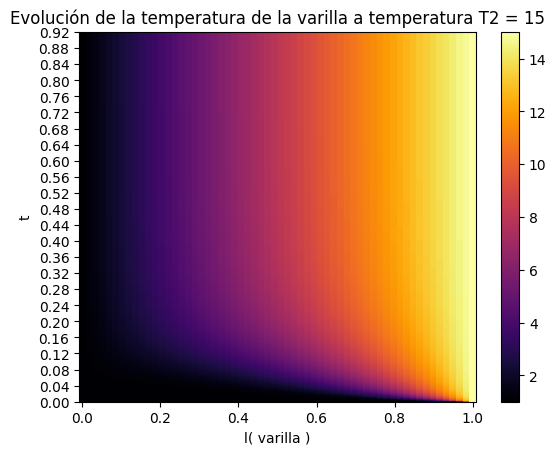

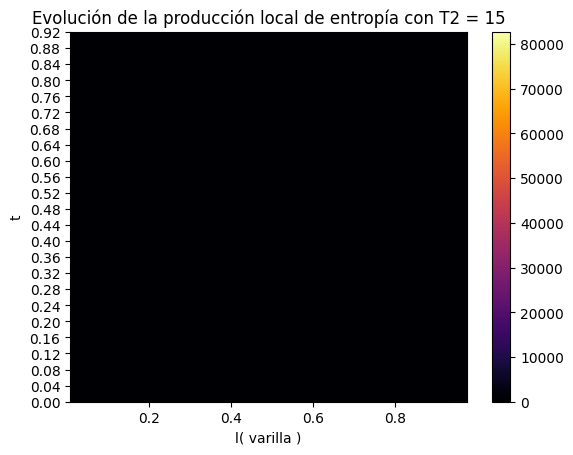

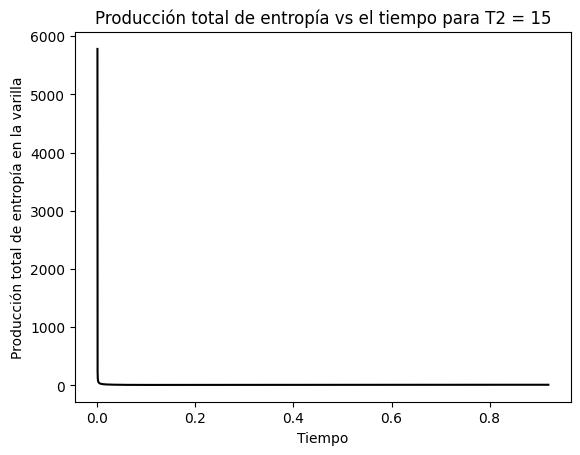

La producción de entropía total en el estado estacionario con T2 = 20es 13.545480634742063
El mínimo de la producción total de entropía con T2 = 20es 9.280994061822517


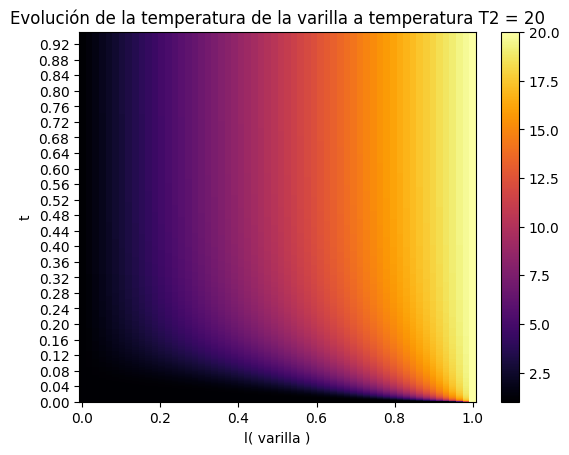

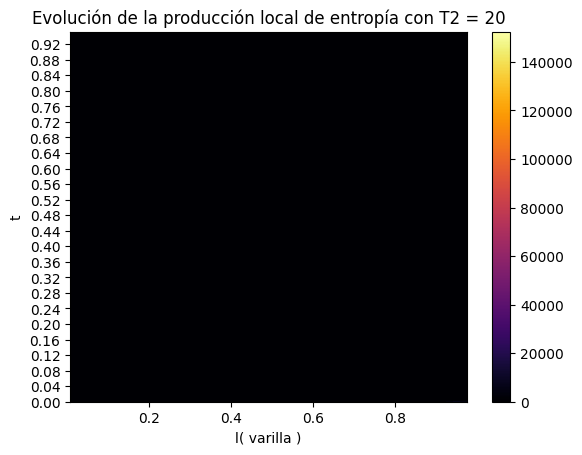

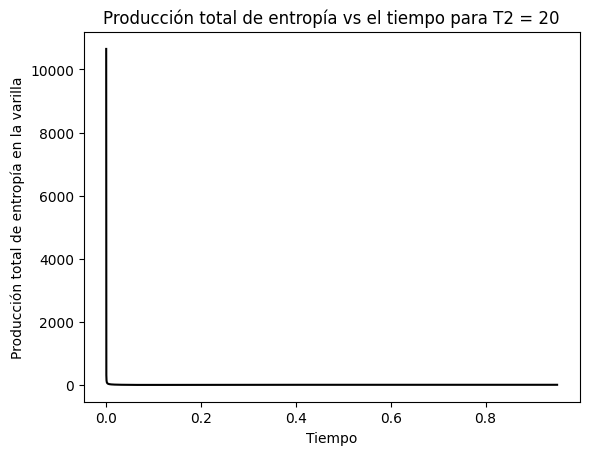

In [12]:
tau3 = 1e-4
chi3 = 1

#Creamos el mallado
x3 = np.linspace(0,1,60) #60 puntos en la parte espacial
h3 = x3[1] - x3[0]
t3 = np.arange(0,1e3+tau3,tau3) #Se toma un vector muy largo de tiempos, pero por cómo hemos tomado la tolerancia, parará antes con lo cual no se hará...
                             # ... un bucle tan largo como parece, pero así aseguramos llegar al e.e.

#Condiciones iniciales y de contorno que no cambian
CI3 = np.ones(len(x3))
CC_03 = np.ones(len(t3))

for j in [1.5,2,3,4,5,10,15,20]: #Aquí simplemente recorremos todos los valores de T2 que se nos piden
    CC_13 = j*np.ones(len(t3))
    matriz_Calor3 = SolNumEqCalor(CI3,CC_03,CC_13,tau3,h3,chi3)
    matriz_Entropia3 = EntropLocal(matriz_Calor3, h3)
    
    #Hallamos un vector de producciones totales de entropía, en cada caso:
    entrop_total = [] #Lista vacía
    for k in range(1, np.shape(matriz_Entropia3)[0]): #No es muy eficiente meter otro bucle, pero para lo que queremos es necesario
        entrop_total.append(np.trapz(matriz_Entropia3[k,:],x3[1:-1]))
    
    #Obtengo los valores pedidos de la entropía total:
    print('La producción de entropía total en el estado estacionario con T2 = ' +  str(j) + 'es ' + str(entrop_total[-1]))
    print('El mínimo de la producción total de entropía con T2 = ' + str(j) + 'es ' + str(np.min(entrop_total)))
    
    #Pintamos los resultados:
    
    plt.pcolormesh(x3, t3[:np.shape(matriz_Calor3)[0]], matriz_Calor3,cmap='inferno') #El vector de tiempos llega hasta donde para la matriz solución
    plt.title('Evolución de la temperatura de la varilla a temperatura T2 = ' + str(j))
    plt.xlabel('l( varilla )')
    plt.ylabel('t')
    plt.colorbar()
    plt.yticks(np.arange(t3[0], t3[np.shape(matriz_Calor3)[0]], 0.04)) #Para que se vea mejor las diferencias de tiempos de llegada al e.e
    plt.show()
    
    plt.pcolormesh(x3[1:-2], t3[:np.shape(matriz_Calor3)[0]], matriz_Entropia3[:,:-1],cmap='inferno')
    plt.title('Evolución de la producción local de entropía con T2 = ' + str(j))
    plt.xlabel('l( varilla )')
    plt.ylabel('t')
    plt.colorbar()
    plt.yticks(np.arange(t3[0], t3[np.shape(matriz_Calor3)[0]], 0.04))
    plt.show()
    
    #Añado las gráficas de la entropía total
    plt.plot(t3[1:np.shape(matriz_Calor3)[0]], entrop_total, color = 'black') #Hemos empezado con t>0 para no estar en la situación constante inicial
    plt.title('Producción total de entropía vs el tiempo para T2 = ' + str(j))
    plt.xlabel('Tiempo')
    plt.ylabel('Producción total de entropía en la varilla')
    plt.show()

Vemos ahora todo lo que se observaba antes con los otros mallados, pero ahora también el programa nos devuelve gráficas con la evolución temporal de la producción total de entropía así como su valor mínimo y el del estado estacionario, que los devuelve por consola.